In [1]:
import numpy as np
from numpy import arctan,pi
from scipy import linalg as lg
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

# domains
x_max = 10e-6
x_min = -10e-6
x = np.linspace(x_min, x_max, 5000)

E0 = 1. #V/m
k0 = 2.*np.pi*(5.*(10**14))/(3*10**8) 
x0 = -2e-6

k_max = k0+k0/2
k_min =k0-k0/2
k1= np.arange(k_min, k_max, 5000)
dk1 = k1[1]-k1[0]

omega_0 = 2 * np.pi * 10**15 # 1/s
gamma = 2 * np.pi * 10**14 # 1/s
N_density = 2*10**22 * 10**4 # oscillators /m^3

q_e = 1.60217662 * 10**(-19) # 1 electric charge, in Coulombs
m_e = 9.10938356 * 10**(-31) # electron mass, in kg
epsilon_0 = 8.85118782 * 10**(-12) # permittivity of free space, unit is m^-3 kg^-1 s^4 A^2

C = N_density * q_e**2 / (m_e*epsilon_0) # unit is s^2

In [2]:
#electric susceptibility
def chi(w):
    return C*(1/(omega_0**2-w**2-1j*w*gamma))
#index of refraction
def N(w):
    return np.sqrt(1 + chi(w))
def result(k):
    return np.sqrt(2.)*E0*x0*np.exp(-x0**2*(k-k0)**2/4.)

In [3]:
N(k1[0]*3.*10.**8)

(1.008559278283271+0.00022727821128703466j)

In [4]:
def final(t):
    propagation=np.zeros(len(x))*1j
    for i in range(len(k1)):
        k=k1[i]
        omega=3.*10.**8*k
        n=N(omega)
        propagation+=result(k)*np.exp(1j*n*k*x)*np.exp(-1j*omega*t)*dk1
    return propagation/(2*np.pi)

In [5]:
# fig, ax = plt.subplots()
# ax.set_title(r"Real part of the pulse")
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r'$Pulse$')
# ax.set_xlim(-2e-6,10e-6)
# ax.plot(x,final(0).real,linewidth=2,label=r'original')
# ax.plot(x,final(4.e-6/3.e8).real,linewidth=2,label=r'after 2$\mu$m')
# plt.legend()
# plt.show()

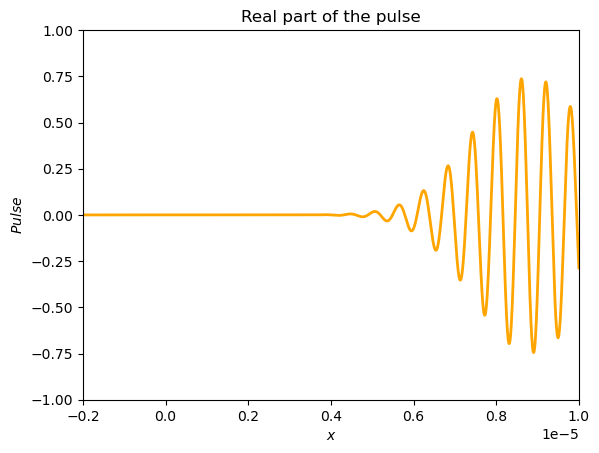

In [6]:
fig, ax = plt.subplots()
ax.set_title(r"Real part of the pulse")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r'$Pulse$')
line, = ax.plot(x,final(0*10**(-6)/3.e8).real,lw=2,color="orange")
ax.margins(0,0.1)
ax.set_xlim(-2e-6,10e-6)
ax.set_ylim(-1,1)
def animate(i):
    line.set_data(x,final(i*10**(-6)/3.e8).real)

ani = animation.FuncAnimation(fig, animate, frames=10)
HTML(ani.to_jshtml())